A classification problem revolves around determining whether something is one thing or another, we can have binary classification, multi-class classification or multi-label classification


<center>
<img src='..\images\01_a_pytorch_workflow.png'>
</center>

<center >

<img src ='..\images\nn_architecture.png' width=650 height=700>
</center>

<center>
<img src='..\\images\\activation_functions.png'>
</center>

In [1]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Creating the data <br>

We'll use a toy problem : the two circles classification problem where we have a bunch of points identified by their corridnates and we will try ot classify them as point of one circle or the other

In [2]:
from sklearn.datasets import make_circles
# We will use make circles to generate a dataset of 1000 samples of two circles
# X has two features  which are (X1, X2) the coordinates of thebpoint
# and y is the class label 0 or 1
n_samples =1000
X, y =make_circles(n_samples=n_samples, noise=0.03, random_state=42)

In [3]:
print(f"First 10 X features:\n{X[:10]}")
print(f"\nFirst 10 y labels:\n{y[:10]}")

First 10 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]
 [-0.47964637  0.67643477]
 [-0.01364836  0.80334872]
 [ 0.77151327  0.14775959]
 [-0.16932234 -0.79345575]
 [-0.1214858   1.02150905]]

First 10 y labels:
[1 1 1 1 0 1 1 1 1 0]


In [4]:
X.shape, y.shape

((1000, 2), (1000,))

In [5]:
import pandas as pd
cricles_dict = {'X1': X[:,0], 'X2' : X[:,1], 'label': y}
df = pd.DataFrame(cricles_dict)
df.head(15)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [6]:
df['label'].value_counts()

label
1    500
0    500
Name: count, dtype: int64

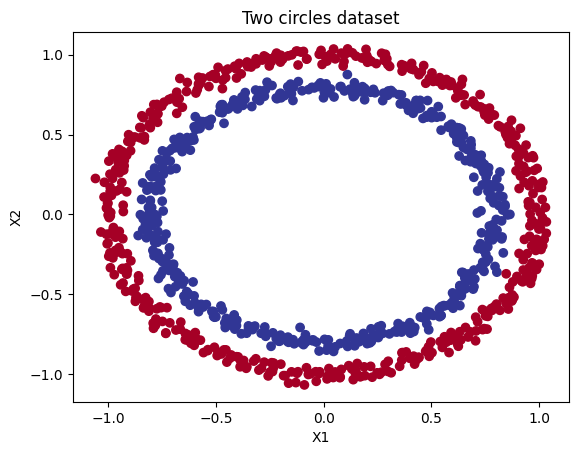

In [7]:
# Let's plot the two circles

import matplotlib.pyplot as plt

# plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)
plt.scatter(df['X1'] ,df['X2'] ,c=y, cmap=plt.cm.RdYlBu)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Two circles dataset')
plt.show()

In [8]:
# Let's check the shape of the input
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")
# two features and one label output

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


Let's convert our data into torch tensors


In [10]:
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [11]:
X.type(), y.type()

('torch.FloatTensor', 'torch.FloatTensor')

Let's split the data into training and testing

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape  

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

### Building the model

In [13]:
import torch
from torch import nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [14]:
class MyCircleClassificationModel(nn.Module):
    def __init__(self):
        super().__init__()
        # . Create 2 nn.Linear layers capable of handling X and y input and output shapes
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features (X), produces 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features, produces 1 feature (y)
        
        
    def forward(self, x):
        return self.layer_2(self.layer_1(x))

In [15]:
my_model = MyCircleClassificationModel()
my_model

MyCircleClassificationModel(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

#### Waiiit a minute ....Why in Layer 1 we went from having 2 features to 5 features...that's sus...
The answer is simple : 

This is known as having 5 hidden units or neurons.
This layer turns the input data from having 2 features to 5 features.

This allows the model to learn patterns from 5 numbers rather than just 2 numbers, potentially leading to better outputs....potentially because sometimes it doesn't work.
The number of hidden units you can use in neural network layers is a hyperparameter (a value you can set yourself) and there's no set in stone value you have to use.
Generally more is better but there's also such a thing as too much. The amount you choose will depend on your model type and dataset you're working with.
Since our dataset is small and simple, we'll keep it small.
The only rule with hidden units is that the next layer, in our case, self.layer_2 has to take the same in_features as the previous layer out_features.
That's why self.layer_2 has in_features=5, it takes the out_features=5 from self.layer_1 and performs a linear computation on them, turning them into out_features=1 (the same shape as y).

In [16]:
# Replicate the model with nn.Sequential
my_model_seq = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

my_model_seq

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [17]:
print(my_model_seq.parameters)

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)>


In [18]:
# Make predictions with the model
untrained_preds = my_model(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[-0.8516],
        [-0.7590],
        [-0.8292],
        [-0.8591],
        [-0.4082],
        [-0.3549],
        [-0.4278],
        [-0.3321],
        [-0.8470],
        [-0.7481]], grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


Let's create a criterion(loss function) and an optimizer
We will use the binary cross entropy loss as a loss function and SGD as an optimizer with lr=0.1


In [19]:

# criterion = nn.BCELoss() # no sigmoid built in
criterion = nn.BCEWithLogitsLoss() # It has sigmoid built in
optimizer = torch.optim.SGD(params = my_model.parameters(), lr=0.1)

C:\Users\PC CABA DZ\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


We will also need an evaluation metric , if the loss function functiont tells us how wrong our model is, an evaluation metric can tell us how right the model is and thus we get to evaluate the model's performance under different perspectives

In this case, we'll use the <b> Accuracy </b> as an evaluation metric

In [20]:
def accuracy_metric(y_true, y_pred):
    if len(y_true)!= len(y_pred):
        raise ValueError('the preedcited and true labels must have the same length')
    # torch.eq() calculates where two tensors are equal
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc

In [21]:
# View the frist 5 outputs of the forward pass on the test data
y_logits = my_model(X_test.to(device))[:10]
y_logits

tensor([[-0.8516],
        [-0.7590],
        [-0.8292],
        [-0.8591],
        [-0.4082],
        [-0.3549],
        [-0.4278],
        [-0.3321],
        [-0.8470],
        [-0.7481]], grad_fn=<SliceBackward0>)

In [22]:
# Use sigmoid on model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.2991],
        [0.3189],
        [0.3038],
        [0.2975],
        [0.3994],
        [0.4122],
        [0.3947],
        [0.4177],
        [0.3001],
        [0.3212]], grad_fn=<SigmoidBackward0>)

In [23]:
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(my_model(X_test.to(device))[:10]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True, True, True, True, True, True])


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], grad_fn=<SqueezeBackward0>)

In [24]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 200

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

train_losses = []
test_losses = []
# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    my_model.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = my_model(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device 
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls
  
    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train) 
    loss = criterion(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train) 
    train_losses.append(loss)
    acc = accuracy_metric(y_true=y_train, 
                      y_pred=y_pred) 

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    my_model.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = my_model(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = criterion(test_logits,
                            y_test)
        test_losses.append(test_loss)
        test_acc = accuracy_metric(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} --> Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 --> Loss: 0.74887, Accuracy: 50.00% | Test loss: 0.74480, Test acc: 50.00%
Epoch: 10 --> Loss: 0.71344, Accuracy: 50.00% | Test loss: 0.71220, Test acc: 50.00%
Epoch: 20 --> Loss: 0.70077, Accuracy: 50.00% | Test loss: 0.70047, Test acc: 50.00%
Epoch: 30 --> Loss: 0.69608, Accuracy: 50.00% | Test loss: 0.69613, Test acc: 50.00%
Epoch: 40 --> Loss: 0.69431, Accuracy: 42.25% | Test loss: 0.69452, Test acc: 43.00%
Epoch: 50 --> Loss: 0.69362, Accuracy: 46.00% | Test loss: 0.69394, Test acc: 45.50%
Epoch: 60 --> Loss: 0.69334, Accuracy: 49.12% | Test loss: 0.69375, Test acc: 45.00%
Epoch: 70 --> Loss: 0.69321, Accuracy: 49.88% | Test loss: 0.69371, Test acc: 47.50%
Epoch: 80 --> Loss: 0.69315, Accuracy: 49.62% | Test loss: 0.69373, Test acc: 50.50%
Epoch: 90 --> Loss: 0.69311, Accuracy: 50.38% | Test loss: 0.69377, Test acc: 49.50%
Epoch: 100 --> Loss: 0.69309, Accuracy: 50.50% | Test loss: 0.69382, Test acc: 48.50%
Epoch: 110 --> Loss: 0.69307, Accuracy: 50.75% | Test loss: 0.693

In [25]:
train_losses = [x.item() for x in train_losses ]


In [26]:
train_losses

[0.7488710284233093,
 0.7434221506118774,
 0.7385280728340149,
 0.7341291308403015,
 0.7301723957061768,
 0.7266112565994263,
 0.7234042286872864,
 0.7205145359039307,
 0.7179092168807983,
 0.7155592441558838,
 0.7134385704994202,
 0.7115241289138794,
 0.7097949385643005,
 0.7082327008247375,
 0.7068207263946533,
 0.705544114112854,
 0.7043895721435547,
 0.7033451199531555,
 0.7023999094963074,
 0.7015443444252014,
 0.7007697820663452,
 0.7000682353973389,
 0.6994328498840332,
 0.6988571882247925,
 0.6983354091644287,
 0.6978625655174255,
 0.6974337697029114,
 0.697045087814331,
 0.6966924071311951,
 0.6963725090026855,
 0.6960822939872742,
 0.6958189606666565,
 0.6955797672271729,
 0.6953626275062561,
 0.6951653361320496,
 0.6949861645698547,
 0.6948234438896179,
 0.6946754455566406,
 0.6945410370826721,
 0.6944186687469482,
 0.6943073272705078,
 0.6942059993743896,
 0.6941137909889221,
 0.6940297484397888,
 0.6939533352851868,
 0.6938835978507996,
 0.693820059299469,
 0.6937620639801

In [27]:
test_losses = [x.item() for x in test_losses ]

In [31]:
len(train_losses), len(test_losses)

(200, 200)

range(1, 201)

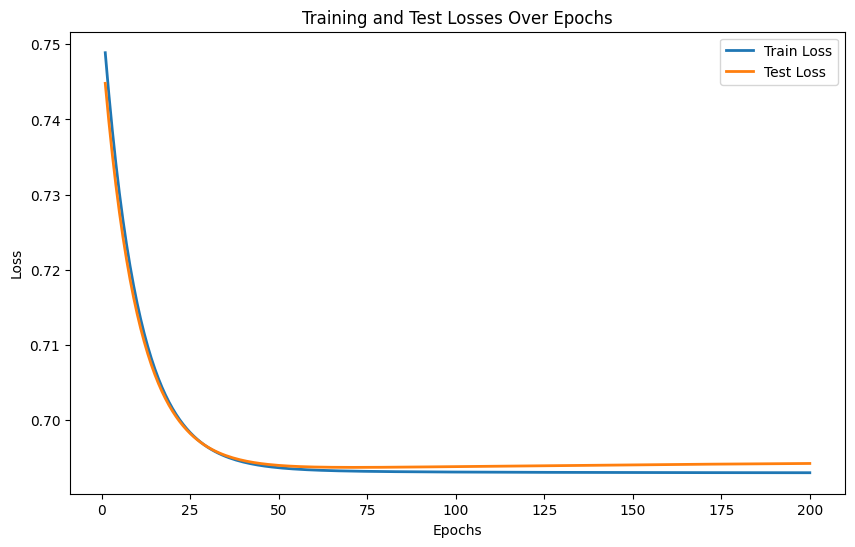

In [51]:
import matplotlib.pyplot as plt
epochs = range(1, len(train_losses) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, label='Train Loss', linewidth=2, alpha=1)
plt.plot(epochs, test_losses, label='Test Loss',  linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Losses Over Epochs')
plt.legend()
plt.show()

In [54]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


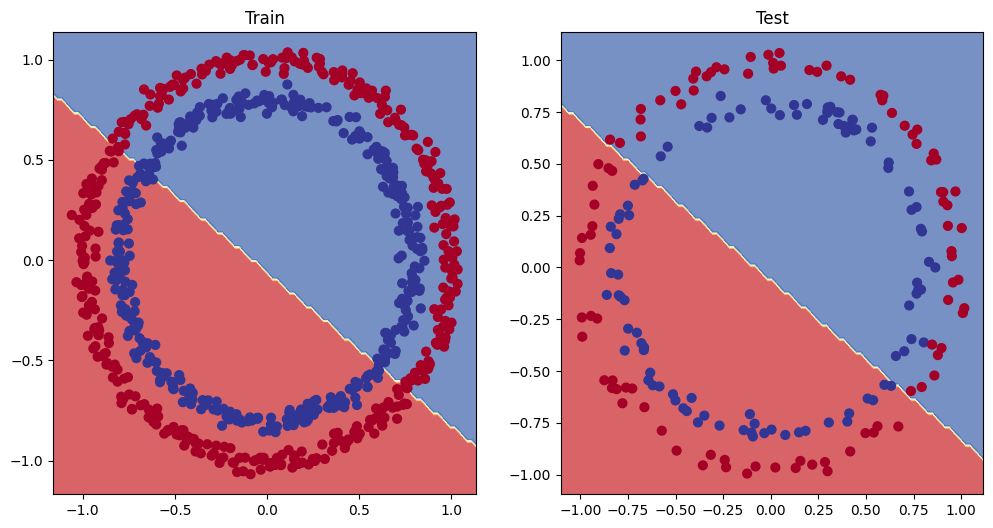

In [55]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(my_model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(my_model, X_test, y_test)

It's currently trying to split the red and blue dots using a straight line...

That explains the 50% accuracy. Since our data is circular, drawing a straight line can at best cut it down the middle.

In machine learning terms, our model is underfitting, meaning it's not learning predictive patterns from the data.

<center>
<img src = ..\images\model_perf.png>
</center>